<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week10/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICUM
Noora Aulia Hidayat

2041720046

TI - 3I

https://github.com/noora20FH/PCVK/blob/week10/week10.ipynb 

In [ ]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [131]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import PIL.Image

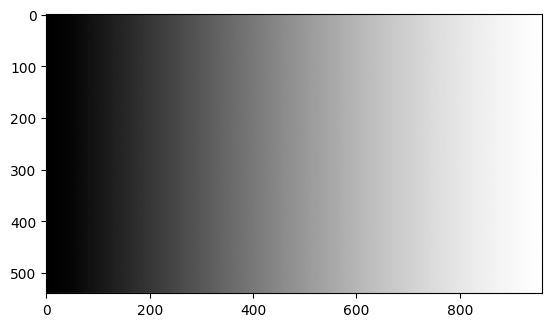

In [72]:
img_ori = cv.imread('/content/drive/MyDrive/gradient.jpg')

img = cv.cvtColor(img_ori, cv.IMREAD_GRAYSCALE)
plt.imshow(img)

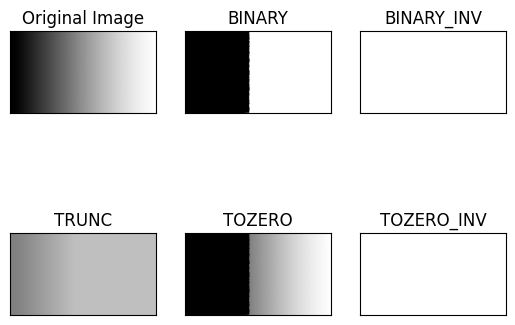

In [66]:


assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#no. 1 Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,TOZERO_INV) according to the description from the chart shown above.

##BINARY

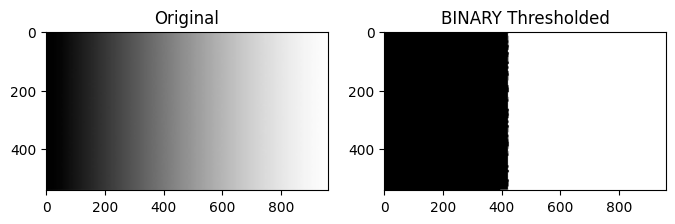

In [104]:

# Apply thresholding using NumPy
threshold_value = 127
img_thresholded = np.where(img > threshold_value, 255, 0)

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY Thresholded')
plt.show()

##BINARY_INV

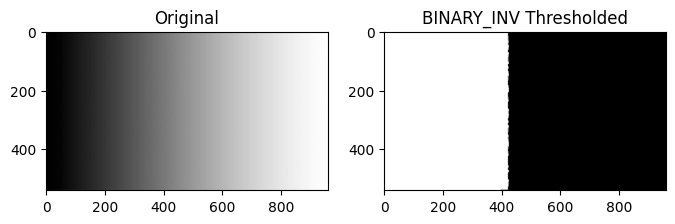

In [40]:

img_arr = np.array(img)

# Apply thresholding using NumPy
threshold_value = 127
# img_thresholded = np.where(img > threshold_value, 0, 255)

# Create a binary image with inverse thresholding
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255


# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY_INV Thresholded')
plt.show()

##TRUNCT

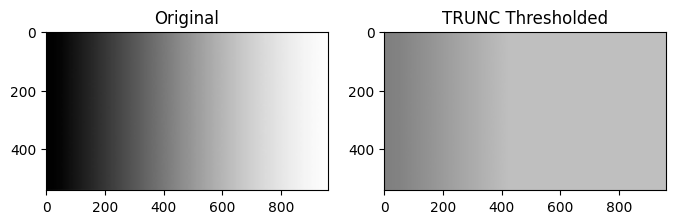

In [57]:
# Apply thresholding using NumPy
threshold_value = 127
img_thresholded = np.where(img > threshold_value, threshold_value, img)

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('TRUNC Thresholded')
plt.show()

##TOZERO

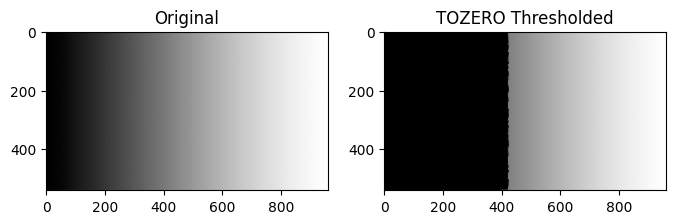

In [45]:
# Set the threshold value
threshold_value = 127

# Apply the thresholding with TOZERO_INV
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = img_arr[i, j]
        else:
            img_thresholded[i, j] = 0
            

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('TOZERO Thresholded')
plt.show()

##TOZERO_INV

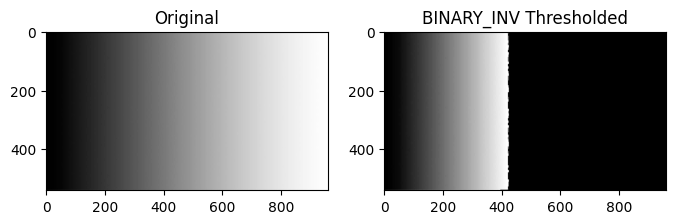

In [42]:

# Set the threshold value
threshold_value = 127

# Apply the thresholding with TOZERO_INV
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            
            img_thresholded[i, j] = img_arr[i, j]

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY_INV Thresholded')
plt.show()

#NO. 2 Create Otsu Thresholding without using the Library. Also display the threshold value when you use Otsu's, as shown in the following image . (use the image lena_gs_lc2.jpg so that it really looks different between the otsu's results and the usual global threshold)

In [97]:
import numpy as np
from PIL import Image

# Load the grayscale image
img = Image.open('/content/drive/MyDrive/lena_gs_lc2.jpg').convert('L')
img_arr = np.array(img)

# Calculate the histogram of pixel intensities
hist, bins = np.histogram(img_arr, bins=256, range=(0, 255))

# Calculate the cumulative sum of the histogram
cumsum = np.cumsum(hist)

# Calculate the cumulative sum of intensities
cumsum_intensity = np.cumsum(hist * np.arange(256))

# Calculate the total number of pixels
total_pixels = img_arr.shape[0] * img_arr.shape[1]

# Initialize variables for storing the maximum between-class variance and threshold value
max_var = 0
threshold_value = 0

# Loop over all possible threshold values
for t in range(256):
    # Calculate the number of foreground pixels and background pixels
    w1 = cumsum[t]
    w2 = total_pixels - w1
    
    # Skip thresholds where one of the classes has no pixels
    if w1 == 0 or w2 == 0:
        continue
    
    # Calculate the mean intensities of the foreground and background pixels
    mean1 = cumsum_intensity[t] / w1
    mean2 = (cumsum_intensity[255] - cumsum_intensity[t]) / w2
    
    # Calculate the between-class variance
    var_between = w1 * w2 * (mean1 - mean2) ** 2
    
    # Update the maximum between-class variance and threshold value if necessary
    if var_between > max_var:
        max_var = var_between
        threshold_value = t

# Apply the Otsu thresholding
rows, cols = img_arr.shape
img_otsu_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_otsu_thresholded[i, j] = 255
        else:
            img_otsu_thresholded[i, j] = 0



In [100]:

img_ori = cv.imread('/content/drive/MyDrive/lena_gs_lc2.jpg')

img = cv.cvtColor(img_ori, cv.IMREAD_GRAYSCALE)


threshold_value = 127
# Apply the thresholding with BINARY
rows, cols = img_arr.shape
img_binary_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 255
        else:
            img_thresholded[i, j] = 0

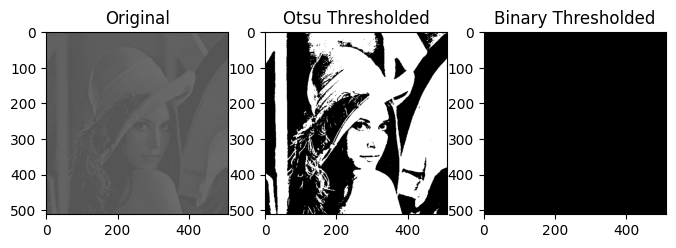

In [101]:

# Display the original and thresholded images
fig, axs = plt.subplots(1, 3, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_otsu_thresholded, cmap='gray')
axs[1].set_title('Otsu Thresholded')
axs[2].imshow(img_binary_thresholded, cmap='gray')
axs[2].set_title('Binary Thresholded')
plt.show()

#no. 3 Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image provided in the images folder .


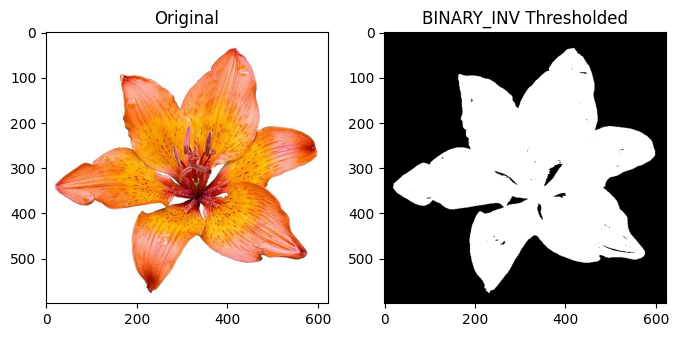

In [183]:
img_ori = cv.imread('/content/drive/MyDrive/lily.jpg')

img = cv.cvtColor(img_ori,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


img_arr = np.array(img_gray)

# Apply thresholding using NumPy
threshold_value = 200

# Create a binary image with inverse thresholding
# img_arr image must be grayscale
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255


# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Asli')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('Citra Segment')
plt.show()



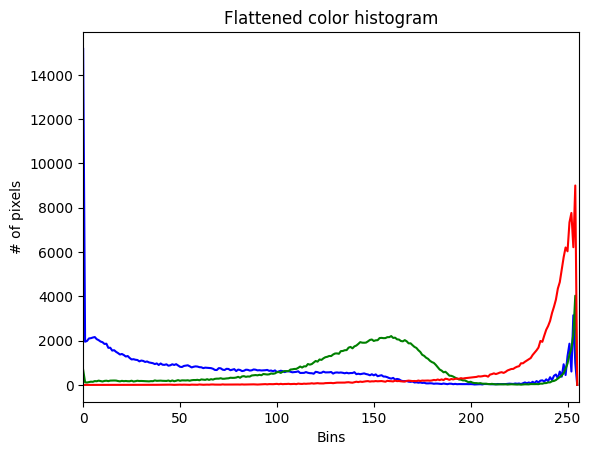

-1

In [202]:
chans = cv.split(img)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
  #set to None -> not use mask
    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    

plt.show()
cv.waitKey(0)

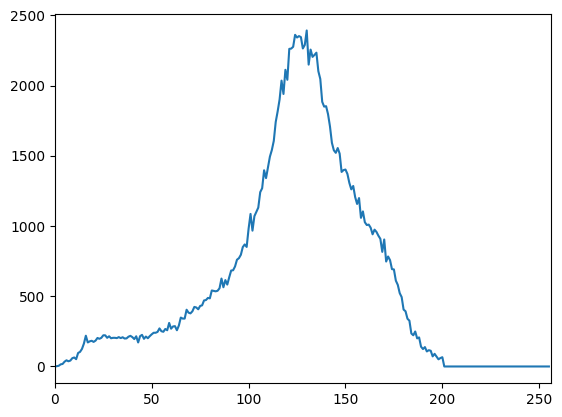

In [203]:

# Apply mask to extract foreground pixels
fg_pixels = cv.bitwise_and(img_gray, img_thresholded)

# Compute histogram of foreground pixels
hist = cv.calcHist([fg_pixels],[0],img_thresholded,[256],[0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

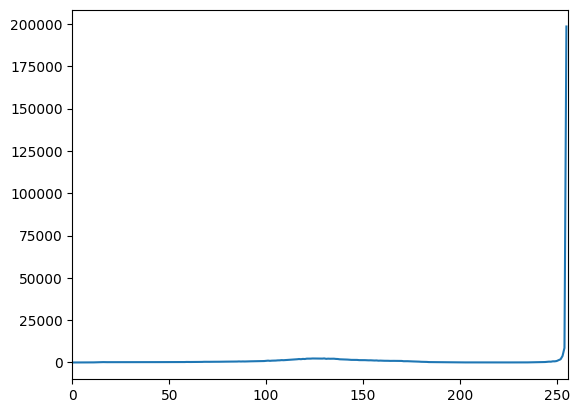

In [193]:
# Create binary mask
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY)

# Apply mask to extract foreground pixels
fg_pixels = cv.bitwise_and(img_gray, mask)

# Compute histogram of foreground pixels
hist = cv.calcHist([fg_pixels],[0],mask,[256],[0,256])

# Plot histogram
plt.plot(hist)
plt.xlim([0, 256])
plt.show()